# Dynamics in the Solow growth model

This notebook covers the derivation and experiments in the Solow growth model.

## Model setup

There is a single planning authority in the economy that organizes capital accumulation, employment and production. Output is produced using the Cobb-Douglas production function

$$Y_t = A K_t^\alpha L^{1-\alpha}.$$

Labor $L$ is fixed, we introduce population growth later. Produced output $Y_t$ is divided between consumption $C_t$ and investment $I_t$, which is represented by the resource constraint

$$Y_t = C_t + I_t.$$

We assume that investment is a constant share $s$ of output, which means that consumption has to constitute the share $1-s$ of output:

$$I_t = s Y_t, \qquad C_t = (1-s)Y_t.$$

Capital accumulates over time using the law of motion for capital

$$K_{t+1} = (1-\delta)K_t + I_t.$$

Initial capital stock $K_0$ is given.

## Model solution

Solving the model means to characterize the evolution of capital stock $K_t$ and other macroeconomic quantities over time, starting from the initial condition $K_0$. We will do this by combining analytical insights with a graphical representation, called the Solow diagram.

### Steady state

While the exact path for the capital stock must be computed numerically, we can analytically determine the level to which the capital stock will converge over time as $t\to\infty$. This level of capital stock is called the <b>steady state</b>.

To determine the steady state, denote $\Delta K_{t+1} = K_{t+1}-K_t $, and rewrite the law of motion for capital as

\begin{align}
\Delta K_{t+1} & = I_t - \delta K_t \\
&= s Y_t - \delta K_t.
\end{align}

The steady state level of capital stock $K^*$ is such that if $K_t = K^*$ in the current period, then also $K_{t+1} = K*$. In other words, once in the steady state, the capital stock does not change over time, $\Delta K_{t+1} = 0$.

Using this condition in the law of motion for capital, we have

\begin{align}
0 = s Y^* - \delta K^*,
\end{align}

where $Y^*$ is the steady state level of output

\begin{align}
Y^* = A (K^*)^\alpha L^{1-\alpha}.
\end{align}

Substituting the steady state level of output in the steady state condition, we can solve for the steady state level of capital

\begin{align}
K^* = \left( \frac{sA}{\delta} \right)^\frac{1}{1-\alpha}.
\end{align}

### Dynamic path for capital and other variables

To determine the evolution of capital from the initial condition $K_0$ to the steady state $K^*$, we first use the investment rule $I_t = sY_t$, and the production function to rewrite the law of motion for capital as

\begin{align}
K_{t+1} &= (1-\delta)K_t + I_t \\
& = (1-\delta)K_t + s Y_t \\
& = (1-\delta)K_t + s  A K_t^\alpha L^{1-\alpha}.
\end{align}

If we know $K_t$, we can use this equation to determine $K_{t+1}$. Hence, we can iterate on this equation and solve for the complete dynamic trajectory, starting from the initial condition $K_0$.

Once we have the capital path, we can compute the remaining macroeconomic quantities as functions of capital:

\begin{align}
Y_t &= A K_t^\alpha L^{1-\alpha}\\
I_t &= s Y_t \\
C_t &= (1-s)Y_t.
\end{align}

## Decentralization with markets for capital and labor

We solved the problem from the perspective of a planning authority that organizes all aspects of production. But we could re-introduce competitive markets without changing the solution in any way.

In particular, we could assume that output is produced by profit-maximizing competitive firms which rent capital and labor and produce output. These firms solve

\begin{align}
\max_{K_t,L} AK^\alpha L^{1-\alpha} - w_t L - r_t K_t.
\end{align}

Optimality conditions for the capital and labor choice then imply

\begin{align}
r_t &= MPK_t = \alpha \frac{Y_t}{K_t} \\
w_t &= MPL_t = (1-\alpha) \frac{Y_t}{L}.
\end{align}

Given the path for capital and output, these conditions can be used to infer the equilibrium paths for the rental rate and wages.

The fact that the solution of the problem from the perspective of a planning authority and the solution obtained from a competitive equilibrium are identical is at the heart of the so-called <b>welfare theorems</b>. These theorems state conditions under which competitive equilibrium outcomes coincide with welfare-maximizing outcomes that can be achieved by a benevolent planning authority.

## Solow diagram

To start with the calculations, we first need to import some useful definitions.

In [1]:
# render graphs within notebook - may want to uncomment the next line for older versions of Jupyter
# %matplotlib inline

# import relevant packages
#import pandas as pd
#import pandas_datareader as pdr
import numpy as np
#import datetime
#from scipy import stats
#from scipy import optimize
#import matplotlib.pyplot as plt
#import matplotlib.ticker as ticker

# load econutil package with some frequently used functions
import econutil as ec

Root package econutil imported.


Now we define model parameters.

In [2]:
# model parameters
param = {'δ': 0.1,     # depreciation
         's': 0.25,    # saving rate
         'L': 1,       # population
         'A': 1,       # total factor productivity
         'α': 1/3      # capital share
        }

We prepare a function that computes the steady state from the given parameters. This will be called several times.

In [3]:
 # steady state calculation from model parameters
def Solow_steady_state(param):
    ss = dict()
    ss['K'] = (param['s']*param['A']/param['δ'])**(1/(1-param['α']))*param['L']
    ss['Y'] = param['A'] * ss['K']**param['α'] * param['L']**(1-param['α'])
    ss['I'] = param['s']*ss['Y']
    ss['C'] = (1-param['s'])*ss['Y']
    ss['r'] = param['α']*ss['Y']/ss['K']
    ss['w'] = (1-param['α'])*ss['Y']/param['L']
    ss['y'] = ss['Y']/param['L']
    ss['k'] = ss['K']/param['L']
    return ss

Now we can plot the Solow diagram, with capital on the horizontal axis and other variables on the vertical axis, represented as functions of capital.

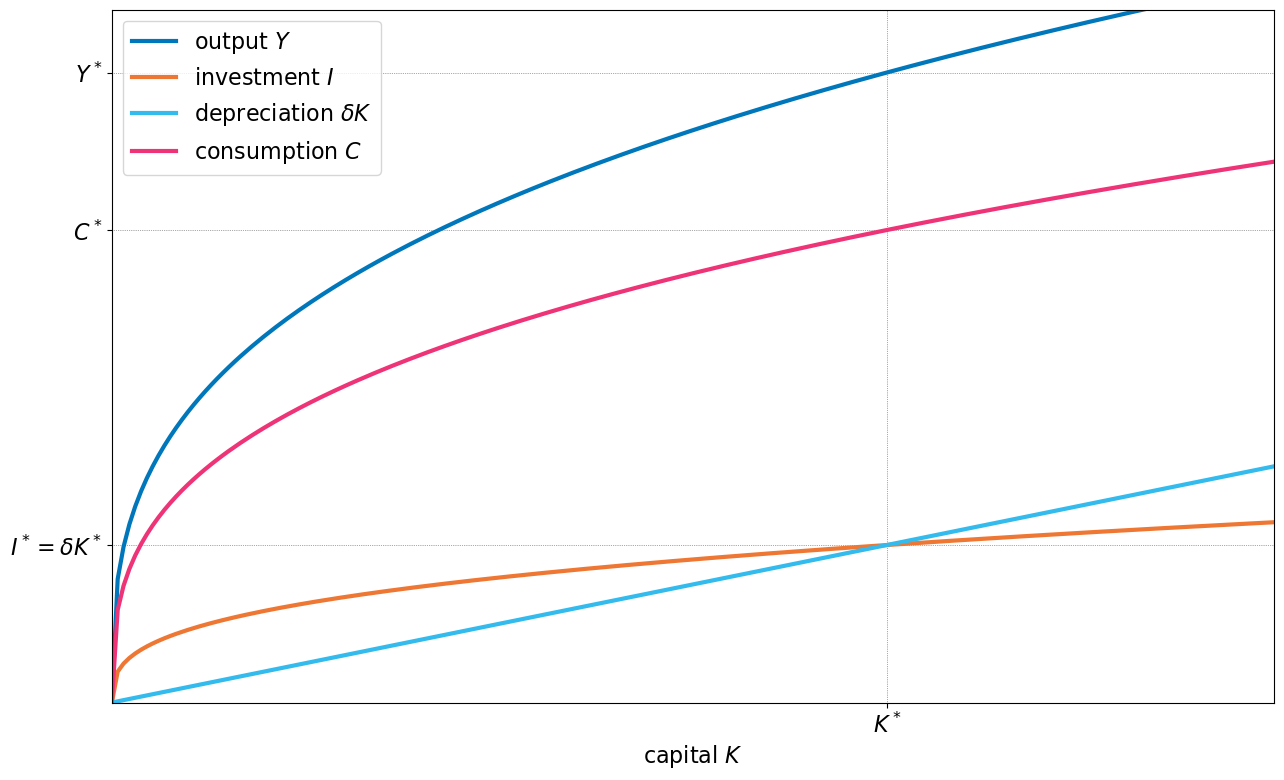

In [4]:
ss = Solow_steady_state(param)

# definitions for the graph
K_max = 1.5*ss['K']
fig_param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [0,K_max], 'ylim': [0,1.1*ss['Y']],
         'xlabel': 'capital $K$', 'ylabel': '',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [11000,20000]}

fig,ax = ec.GenerateTSPlot(fig_param)

K_grid = np.linspace(0,K_max,200)
Y_grid = param['A']*K_grid**param['α']*param['L']**(1-param['α'])

ax.plot(K_grid,Y_grid, linewidth=3,marker='',color=ec.clist_vibrant[0],label='output $Y$')
ax.plot(K_grid,param['s']*Y_grid, linewidth=3,marker='',color=ec.clist_vibrant[1],label='investment $I$')
ax.plot(K_grid,param['δ']*K_grid, linewidth=3,marker='',color=ec.clist_vibrant[2],label='depreciation $\\delta K$')
ax.plot(K_grid,(1-param['s'])*Y_grid, linewidth=3,marker='',color=ec.clist_vibrant[3],label='consumption $C$')

# plot axis labels
cur_xticks = ax.get_xticks()
cur_xlim = ax.get_xlim()
cur_yticks = ax.get_yticks()
cur_ylim = ax.get_ylim()

#ax.set_xticks(list(cur_xticks) + [ss['K']])
#ax.set_xticklabels(list(cur_xticks) + ['$K^*$'])
ax.set_xticks([ss['K']])
ax.set_xticklabels(['$K^*$'])
ax.set_xlim(cur_xlim)

#ax.set_yticks(list(np.round(cur_yticks,1)) + [ss['I'],ss['Y']])
#ax.set_yticklabels(list(np.round(cur_yticks,1)) + ['$I^* = \delta K^*$','$Y^*$'])
ax.set_yticks([ss['I'],ss['C'],ss['Y']])
ax.set_yticklabels(['$I^* = \\delta K^*$','$C^*$','$Y^*$'])
ax.set_ylim(cur_ylim)

ax.legend(loc='upper left');

## Experiments in the Solow model

We can now move to experiments in the Solow model. The experiment starts in the steady state, given by old parameter values in <tt>param_old</tt>. Then, at time $t=0$, the parameters of the economy change to <tt>param_new</tt>. We will plot the evolution of thetrajectories from the old to the new steady state over time.

We start by defining parameters, for the economy before and after the experiment.

In [5]:
# initial model parameters, and the corresponding steady state
param_old = {'δ': 0.1, 's': 0.25, 'L': 1, 'A': 1, 'α': 1/3}
ss_old = Solow_steady_state(param_old)

# new model parameters, including an adjustment in the capital stock if needed for the experiment
param_new = {'δ': 0.1, 's': 1, 'L': 1, 'A': 1, 'α': 1/3, 'K0': 1*ss_old['K']}
ss_new = Solow_steady_state(param_new)

Now we can plot the Solow diagram with the experiment. Dashed thinner lines represent the old Solow diagram, thicker solid lines represent the diagram for the new parameterization.

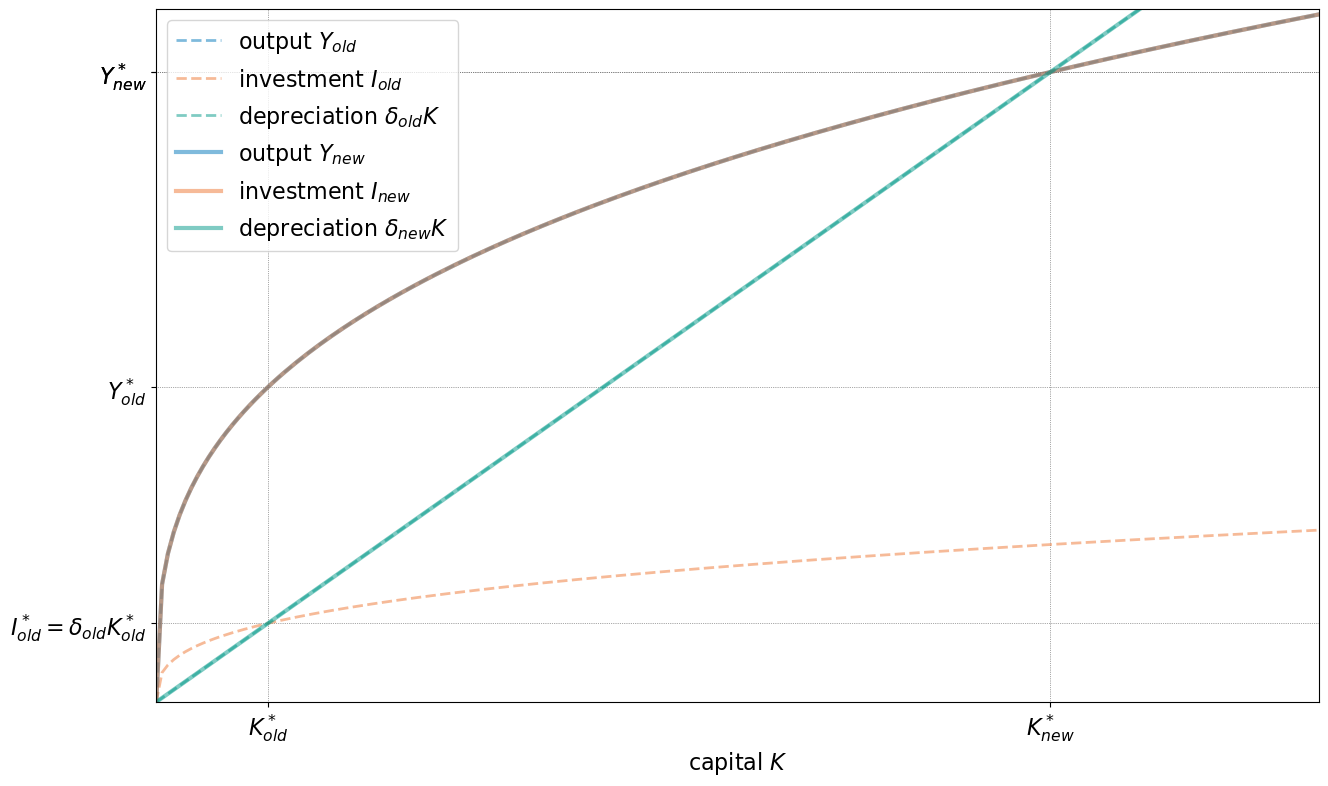

In [6]:
# definitions for the graph
K_max = 1.3*np.maximum(ss_old['K'],ss_new['K'])
fig_param = {'figsize' : [15,9], 'fontsize': 16,
         'title': '',
         'xlim': [0,K_max], 'ylim': [0,1.1*np.maximum(ss_old['Y'],ss_new['Y'])],
         'xlabel': 'capital $K$', 'ylabel': '',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [11000,20000]}

fig,ax = ec.GenerateTSPlot(fig_param)

K_grid = np.linspace(0,K_max,200)
Y_old_grid = param_old['A']*K_grid**param_old['α']*param_old['L']**(1-param_old['α'])
Y_new_grid = param_new['A']*K_grid**param_new['α']*param_new['L']**(1-param_new['α'])

ax.plot(K_grid,Y_old_grid, linewidth=2,marker='',linestyle='--',alpha=0.5,color=ec.clist_vibrant[0],label='output $Y_{old}$')
ax.plot(K_grid,param_old['s']*Y_old_grid, linewidth=2,marker='',linestyle='--',alpha=0.5,color=ec.clist_vibrant[1],label='investment $I_{old}$')
ax.plot(K_grid,param_old['δ']*K_grid, linewidth=2,marker='',linestyle='--',alpha=0.5,color=ec.clist_vibrant[4],label='depreciation $\\delta_{old} K$')

ax.plot(K_grid,Y_new_grid, linewidth=3,marker='',alpha=0.5,color=ec.clist_vibrant[0],label='output $Y_{new}$')
ax.plot(K_grid,param_new['s']*Y_new_grid, linewidth=3,marker='',alpha=0.5,color=ec.clist_vibrant[1],label='investment $I_{new}$')
ax.plot(K_grid,param_new['δ']*K_grid, linewidth=3,marker='',alpha=0.5,color=ec.clist_vibrant[4],label='depreciation $\\delta_{new} K$')


# plot axis labels
cur_xticks = ax.get_xticks()
cur_xlim = ax.get_xlim()
cur_yticks = ax.get_yticks()
cur_ylim = ax.get_ylim()

ax.set_xticks([ss_old['K'],ss_new['K']])
ax.set_xticklabels(['$K^*_{old}$','$K^*_{new}$'])
ax.set_xlim(cur_xlim)

ax.set_yticks([ss_old['I'],ss_old['Y'],ss_new['I'],ss_new['Y']])
ax.set_yticklabels(['$I^*_{old} = \\delta_{old} K^*_{old}$','$Y^*_{old}$','$I^*_{new} = \\delta_{new} K^*_{new}$','$Y^*_{new}$'])
ax.set_ylim(cur_ylim)

ax.legend(loc='upper left');

fig.savefig('graphs/04-solow-diagram.pdf', bbox_inches='tight')

## Trajectories

Define trajectories for variables of interest. Experiment occurs at time $t=0$, the economy is in its old steady state before $t = 0$.

In [7]:
# compute trajectories
Tmin, Tmax = -5, 100

K_path = np.empty(Tmax-Tmin+1)

# path starts in old steady state for periods Tmin,...,0
K_path[0:-Tmin] = ss_old['K']
K_path[-Tmin] = param_new['K0']

for t in range(-Tmin,Tmax-Tmin):
    K_path[t+1] = (1-param_new['δ'])*K_path[t] + param_new['s']*param_new['A']*K_path[t]**param_new['α']*param_new['L']**(1-param_new['α'])

Y_path = param_new['A'] * K_path**param_new['α'] * param_new['L']**(1-param_new['α'])
I_path = param_new['s'] * Y_path
C_path = (1-param_new['s']) * Y_path
r_path = param_new['α']*Y_path/K_path
w_path = (1-param_new['α'])*Y_path/param_new['L']
k_path = K_path/param_new['L']
y_path = Y_path/param_new['L']

Y_path[0:-Tmin] = param_old['A'] * K_path[0:-Tmin]**param_old['α'] * param_old['L']**(1-param_old['α'])
I_path[0:-Tmin] = param_old['s'] * Y_path[0:-Tmin]
C_path[0:-Tmin] = (1-param_old['s']) * Y_path[0:-Tmin]
r_path[0:-Tmin] = param_old['α']*Y_path[0:-Tmin]/K_path[0:-Tmin]
w_path[0:-Tmin] = (1-param_old['α'])*Y_path[0:-Tmin]/param_old['L']
k_path[0:-Tmin] = K_path[0:-Tmin]/param_old['L']
y_path[0:-Tmin] = Y_path[0:-Tmin]/param_old['L']



Finally, we can plot trajectories for all endogenous variables.

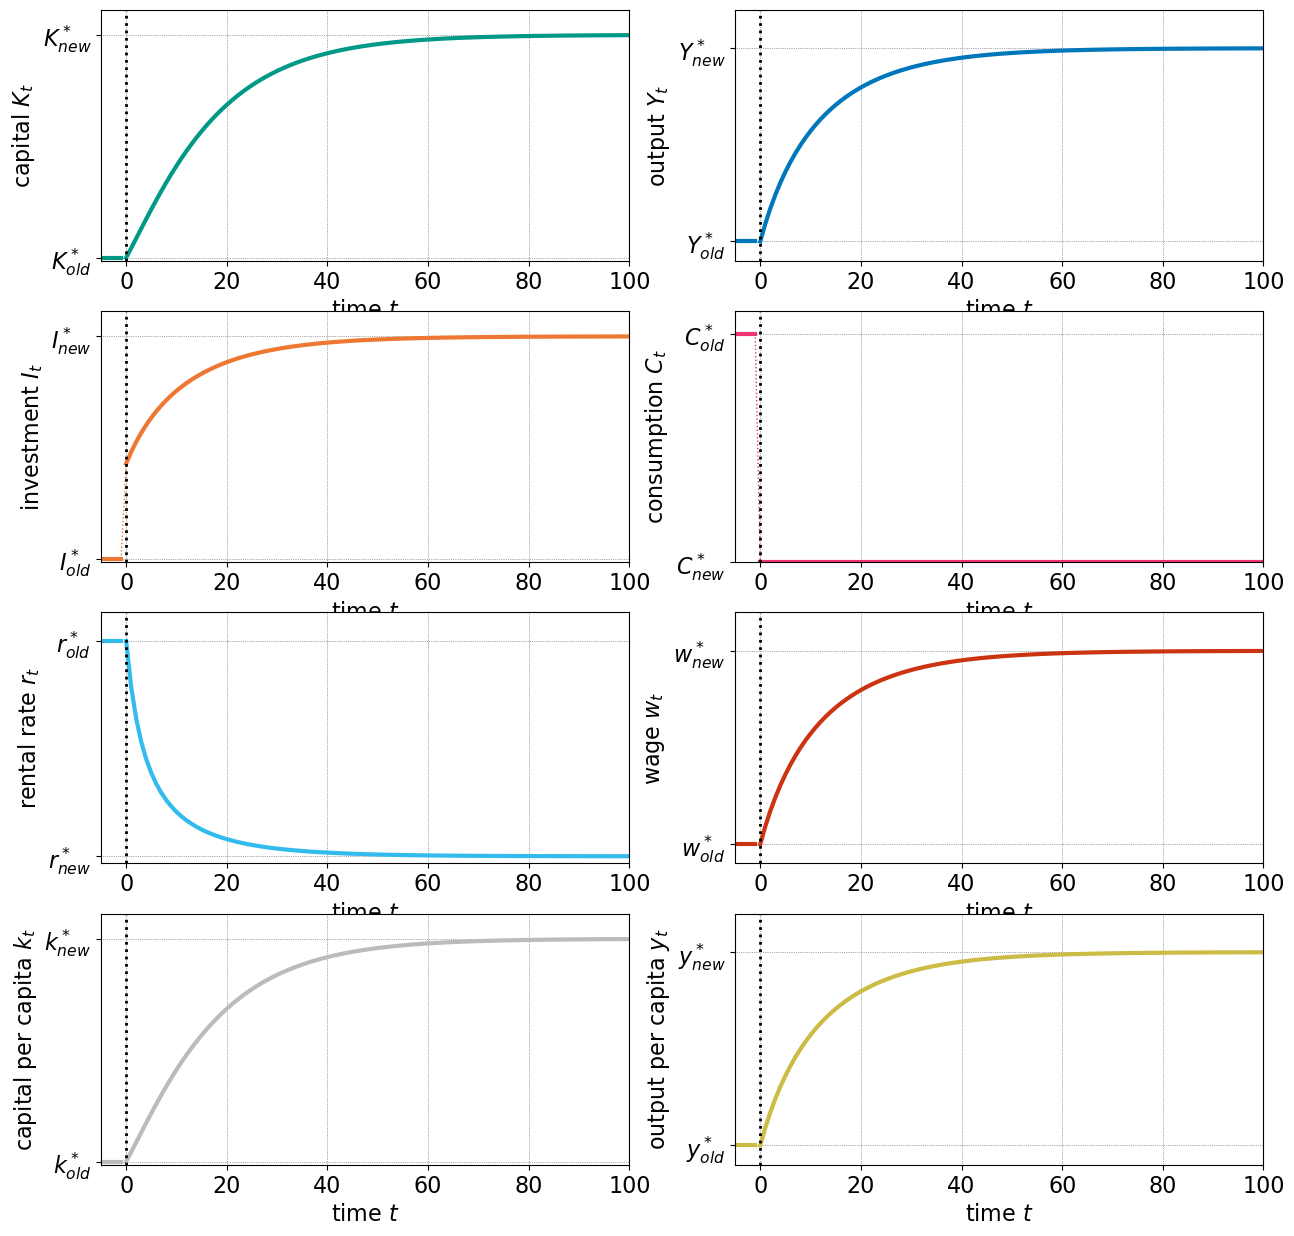

In [8]:
# definitions for the graph
T_path = np.linspace(Tmin,Tmax,Tmax-Tmin+1)
fig_param = {'figsize' : [15,15], 'fontsize': 16, 'subplots': [4,2],
         'title': '',
         'xlim': [Tmin,Tmax], 'ylim': [1,1],
         'xlabel': 'time $t$', 'ylabel': '',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [11000,20000]}

fig,ax = ec.GenerateTSPlot(fig_param)

# capital path
ylim = [0.9*min(K_path),1.1*max(K_path)]
ax[0][0].plot(T_path[0:-Tmin],K_path[0:-Tmin], linewidth=3,marker='',linestyle='-',alpha=1,color=ec.clist_vibrant[4],label='capital $K_t$')
ax[0][0].plot(T_path[-Tmin-1:-Tmin+1],K_path[-Tmin-1:-Tmin+1], linewidth=1,marker='',linestyle=':',alpha=1,color=ec.clist_vibrant[4])
ax[0][0].plot(T_path[-Tmin:Tmax-Tmin+1],K_path[-Tmin:Tmax-Tmin+1], linewidth=3,marker='',linestyle='-',alpha=1,color=ec.clist_vibrant[4])
ax[0][0].plot([0,0],ylim,linewidth=2,linestyle=':',color='k')
ax[0][0].set_ylabel('capital $K_t$')
ax[0][0].set_yticks([ss_old['K'],ss_new['K']])
ax[0][0].set_yticklabels(['$K^*_{old}$','$K^*_{new}$'])
ax[0][0].set_ylim(ylim)

# output path
ylim = [0.9*min(Y_path),1.1*max(Y_path)]
ax[0][1].plot(T_path[0:-Tmin],Y_path[0:-Tmin], linewidth=3,marker='',linestyle='-',alpha=1,color=ec.clist_vibrant[0],label='output $Y_t$')
ax[0][1].plot(T_path[-Tmin-1:-Tmin+1],Y_path[-Tmin-1:-Tmin+1], linewidth=1,marker='',linestyle=':',alpha=1,color=ec.clist_vibrant[0])
ax[0][1].plot(T_path[-Tmin:Tmax-Tmin+1],Y_path[-Tmin:Tmax-Tmin+1], linewidth=3,marker='',linestyle='-',alpha=1,color=ec.clist_vibrant[0])
ax[0][1].plot([0,0],ylim,linewidth=2,linestyle=':',color='k')
ax[0][1].set_ylabel('output $Y_t$')
ax[0][1].set_yticks([ss_old['Y'],ss_new['Y']])
ax[0][1].set_yticklabels(['$Y^*_{old}$','$Y^*_{new}$'])
ax[0][1].set_ylim(ylim)

# investment path
ylim = [0.9*min(I_path),1.1*max(I_path)]
ax[1][0].plot(T_path[0:-Tmin],I_path[0:-Tmin], linewidth=3,marker='',linestyle='-',alpha=1,color=ec.clist_vibrant[1],label='consumption $C_t$')
ax[1][0].plot(T_path[-Tmin-1:-Tmin+1],I_path[-Tmin-1:-Tmin+1], linewidth=1,marker='',linestyle=':',alpha=1,color=ec.clist_vibrant[1])
ax[1][0].plot(T_path[-Tmin:Tmax-Tmin+1],I_path[-Tmin:Tmax-Tmin+1], linewidth=3,marker='',linestyle='-',alpha=1,color=ec.clist_vibrant[1])
ax[1][0].plot([0,0],ylim,linewidth=2,linestyle=':',color='k')
ax[1][0].set_ylabel('investment $I_t$')
ax[1][0].set_yticks([ss_old['I'],ss_new['I']])
ax[1][0].set_yticklabels(['$I^*_{old}$','$I^*_{new}$'])
ax[1][0].set_ylim(ylim)

# consumption path
ylim = [0.9*min(C_path),1.1*max(C_path)]
ax[1][1].plot(T_path[0:-Tmin],C_path[0:-Tmin], linewidth=3,marker='',linestyle='-',alpha=1,color=ec.clist_vibrant[3],label='consumption $C_t$')
ax[1][1].plot(T_path[-Tmin-1:-Tmin+1],C_path[-Tmin-1:-Tmin+1], linewidth=1,marker='',linestyle=':',alpha=1,color=ec.clist_vibrant[3])
ax[1][1].plot(T_path[-Tmin:Tmax-Tmin+1],C_path[-Tmin:Tmax-Tmin+1], linewidth=3,marker='',linestyle='-',alpha=1,color=ec.clist_vibrant[3])
ax[1][1].plot([0,0],ylim,linewidth=2,linestyle=':',color='k')
ax[1][1].set_ylabel('consumption $C_t$')
ax[1][1].set_yticks([ss_old['C'],ss_new['C']])
ax[1][1].set_yticklabels(['$C^*_{old}$','$C^*_{new}$'])
ax[1][1].set_ylim(ylim)

# rental rate path
ylim = [0.9*min(r_path),1.1*max(r_path)]
ax[2][0].plot(T_path[0:-Tmin],r_path[0:-Tmin], linewidth=3,marker='',linestyle='-',alpha=1,color=ec.clist_vibrant[2],label='consumption $C_t$')
ax[2][0].plot(T_path[-Tmin-1:-Tmin+1],r_path[-Tmin-1:-Tmin+1], linewidth=1,marker='',linestyle=':',alpha=1,color=ec.clist_vibrant[2])
ax[2][0].plot(T_path[-Tmin:Tmax-Tmin+1],r_path[-Tmin:Tmax-Tmin+1], linewidth=3,marker='',linestyle='-',alpha=1,color=ec.clist_vibrant[2])
ax[2][0].plot([0,0],ylim,linewidth=2,linestyle=':',color='k')
ax[2][0].set_ylabel('rental rate $r_t$')
ax[2][0].set_yticks([ss_old['r'],ss_new['r']])
ax[2][0].set_yticklabels(['$r^*_{old}$','$r^*_{new}$'])
ax[2][0].set_ylim(ylim)

# wage path
ylim = [0.9*min(w_path),1.1*max(w_path)]
ax[2][1].plot(T_path[0:-Tmin],w_path[0:-Tmin], linewidth=3,marker='',linestyle='-',alpha=1,color=ec.clist_vibrant[5],label='consumption $C_t$')
ax[2][1].plot(T_path[-Tmin-1:-Tmin+1],w_path[-Tmin-1:-Tmin+1], linewidth=1,marker='',linestyle=':',alpha=1,color=ec.clist_vibrant[5])
ax[2][1].plot(T_path[-Tmin:Tmax-Tmin+1],w_path[-Tmin:Tmax-Tmin+1], linewidth=3,marker='',linestyle='-',alpha=1,color=ec.clist_vibrant[5])
ax[2][1].plot([0,0],ylim,linewidth=2,linestyle=':',color='k')
ax[2][1].set_ylabel('wage $w_t$')
ax[2][1].set_yticks([ss_old['w'],ss_new['w']])
ax[2][1].set_yticklabels(['$w^*_{old}$','$w^*_{new}$'])
ax[2][1].set_ylim(ylim)

# capital per capita path
ylim = [0.9*min(k_path),1.1*max(k_path)]
ax[3][0].plot(T_path[0:-Tmin],k_path[0:-Tmin], linewidth=3,marker='',linestyle='-',alpha=1,color=ec.clist_vibrant[6],label='capital $K_t$')
ax[3][0].plot(T_path[-Tmin-1:-Tmin+1],k_path[-Tmin-1:-Tmin+1], linewidth=1,marker='',linestyle=':',alpha=1,color=ec.clist_vibrant[6])
ax[3][0].plot(T_path[-Tmin:Tmax-Tmin+1],k_path[-Tmin:Tmax-Tmin+1], linewidth=3,marker='',linestyle='-',alpha=1,color=ec.clist_vibrant[6])
ax[3][0].plot([0,0],ylim,linewidth=2,linestyle=':',color='k')
ax[3][0].set_ylabel('capital per capita $k_t$')
ax[3][0].set_yticks([ss_old['k'],ss_new['k']])
ax[3][0].set_yticklabels(['$k^*_{old}$','$k^*_{new}$'])
ax[3][0].set_ylim(ylim)

# output per capita path
ylim = [0.9*min(y_path),1.1*max(y_path)]
ax[3][1].plot(T_path[0:-Tmin],y_path[0:-Tmin], linewidth=3,marker='',linestyle='-',alpha=1,color=ec.clist_vibrant[7],label='output $Y_t$')
ax[3][1].plot(T_path[-Tmin-1:-Tmin+1],y_path[-Tmin-1:-Tmin+1], linewidth=1,marker='',linestyle=':',alpha=1,color=ec.clist_vibrant[7])
ax[3][1].plot(T_path[-Tmin:Tmax-Tmin+1],y_path[-Tmin:Tmax-Tmin+1], linewidth=3,marker='',linestyle='-',alpha=1,color=ec.clist_vibrant[7])
ax[3][1].plot([0,0],ylim,linewidth=2,linestyle=':',color='k')
ax[3][1].set_ylabel('output per capita $y_t$')
ax[3][1].set_yticks([ss_old['y'],ss_new['y']])
ax[3][1].set_yticklabels(['$y^*_{old}$','$y^*_{new}$'])
ax[3][1].set_ylim(ylim);

fig.savefig('graphs/04-solow-trajectories.pdf', bbox_inches='tight')

## Population growth

We first deal with population growth. If population growth is zero, $g=0$, then we can ignore this step. We simply fix population $L_t$ at the given initial value $L_0 = L$, the transformation in this subsection can be skipped, and we obtain the baseline model with a fixed population.

Population grows exogenously at the rate $g$, so that

$$L_{t+1} = (1+g)L_t,$$

and initial population is given by $L_0$.

The idea is to represent the Solow diagram in terms of capital per capita $K_t/L_t$ and output per capita $Y_t/L_t$. The reason is that in a model with constant population, capital and output converge to the steady state. This will no longer be true in the model with population growth. In this model, capital and output will grow at constant rates in the long run, which is inconvenient for a representation in the Solow diagram.

However, capital per capita $K_t/L_t$ and output per capita $Y_t/L_t$ will converge to a steady state. The procedure then is to first construct the model solution in terms of capital per capita and output per capita, and then infer paths for capital and output.

Define the per-capita quantities

\begin{align}
y_t = \frac{Y_t}{L_t}, \qquad k_t = \frac{K_t}{L_t}.
\end{align}

We now need to rewrite the production function and the law of motion for capital in terms of $y_t$ and $k_t$.

Dividing the production function by $L_t$ yields

\begin{align}
y_t = \frac{Y_t}{L_t} = \frac{AK_t^\alpha L_t^{1-\alpha}}{L_t} = A\left(\frac{K_t}{L_t}\right)^\alpha = Ak_t^\alpha.
\end{align}

Similarly, dividing the law of motion for capital by $L_t$ yields

\begin{align}
\frac{K_{t+1}}{L_t} = (1-\delta)\frac{K_t}{L_t} + s \frac{Y_t}{L_t} = (1-\delta)k_t + sy_t.
\end{align}

The right-hand side looks fine, but the left-hand side requires some manipulation:

\begin{align}
\frac{K_{t+1}}{L_t} = \frac{K_{t+1}}{L_{t+1}}\frac{L_{t+1}}{L_t} = k_{t+1}(1+g),
\end{align}

so that the law of motion for capital in per-capita terms yields

\begin{align}
k_{t+1} = \frac{1-\delta}{1+g}k_t + \frac{s}{1+g} y_t.
\end{align}

We can now define modified parameters $\widetilde\delta$ and $\widetilde s$ as

\begin{align}
1-\widetilde\delta = \frac{1-\delta}{1+g},\qquad \widetilde{s} = \frac{s}{1+g}.
\end{align}

and write the law of motion for capital as

\begin{align}
k_{t+1} = (1-\widetilde\delta)k_t + \widetilde{s} y_t.
\end{align}

We can now work with the new production function in per capita terms, and with the law of motion for capital in per capita terms in the same way as in the model with constant population. The only difference now is that the Solow diagram implies that there exists a steady state for capital per capita and for output per capita, rather than for capital and output themselves.

This means that the economy stabilizes in the long run in the sense that capital and output grow at the same rate as population.